## Questions
* what is the following code for?

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Contents 
### 

### 



# General settings
## Update matplotlib

In [2]:
!python  -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\ljyan\anaconda3\lib\site-packages (18.1)


In [ ]:
import matplotlib
matplotlib.__version__
!pip install matplotlib upgrade

## Modifying styles
Matplotlib comes with a number of different stylesheets to customize the overall look of different plots. To list all the available style sheets you can execute: print(plt.style.available).

In [10]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')
#plt.style.use('default')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


## Setting figure size


## Miscellaneous tricks

* plt.xticks(`[]`) can turn off ticks. This is different from turning off the axis with plt.axis('off').  
* plt.plot(aapl, 'k-.'):  k indicates black, -. indicates dash dot.
* Use the hist() with cumulative=True to replace the ECDF function used before. 
* plt.twinx() allows two figures share the same x-axis but with different y-scale. 
* plt.plot() many times but only one plt.show(), then usually all curves will be on the same plot. Otherwise, many plt.show() will give many plots. 


# Non-statistical plots
## Plotting 1D array

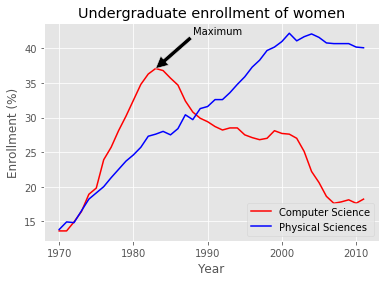

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col = None)
year = df['Year'].values 
physical_sciences = df['Physical Sciences'].values
computer_science = df['Computer Science']

#If x-axis data is missed, then it will automatically add data or using the index from pandas-Series, etc.
plt.plot(year, computer_science, color='red', label='Computer Science') #lable contents will go to legend
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower right') #This will show the label contents specified earlier. Can also be e.g. 'lower center' etc. 

# Add a black arrow annotation
cs_max = computer_science.max()
yr_max = year[computer_science.idxmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))


# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()



By calling plt.axes([xlo, ylo, width, height]), a set of axes is created and made active with lower corner at coordinates (xlo, ylo) of the specified width and height. The coordinates and lengths are values between 0 and 1 representing lengths relative to the dimensions of the figure.  This approach is very flexible. Particularly when we want plot an arbitrary size inset view inside a figure at an arbitrary position. If specific position is not required, then using subplot introduced later is a better idea as it can determine layout automatically. 

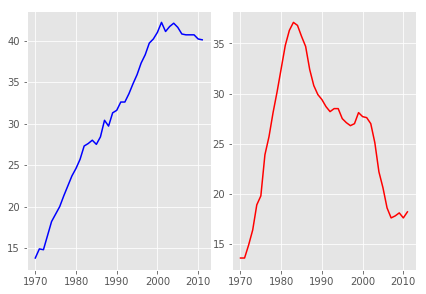

In [7]:
plt.axes([0.05,0.05,0.425,0.9]) 
plt.plot(year, physical_sciences, color='blue')
plt.axes([0.525,0.05,0.425,0.9])
plt.plot(year,computer_science,color = 'red')


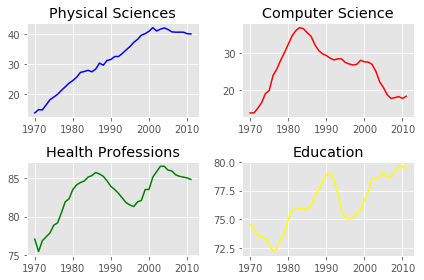

In [11]:
health = df['Health Professions'].values
education = df["Education"]
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# # Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


plt.xlim() and plt.ylim() allow you to either zoom or expand the plot or to set the axis ranges to include important values. This effectively provide a 'slower' version of interactive visualization.

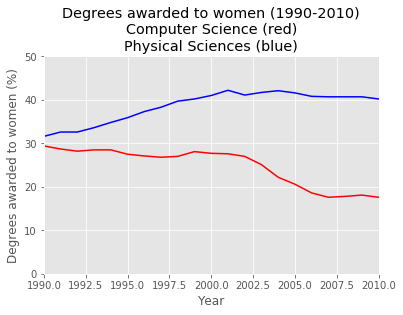

In [12]:
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

plt.xlim([1990,2010])
plt.ylim([0,50])
#plt.axis((1990,2010,0,50)) 
#This can replace the above two sentences. Note plt.axis is not plt.axes introduced earlier. 

plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()

# Save the image as 'xlim_and_ylim.png'
plt.savefig('xlim_and_ylim.png')


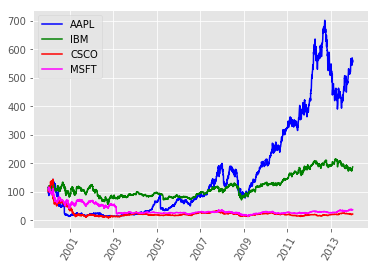

## Plotting 2D array 

In [2]:
# Import numpy and matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21) #Note linspace is not linespace

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v) # repeat u data along axis = 0 gives X. repeat v along axis = 1 gives Y.
print(X.shape,Y.shape)
print(X[0:2])
print(Y[0:2])
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

plt.pcolor(Z) # pcolor() is a way to plot 2D array. 
plt.show()


(21, 41) (21, 41)
[[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
  -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
   0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
 [-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
  -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
   0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]]
[[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9
  -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9
  -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9 -0.9]]


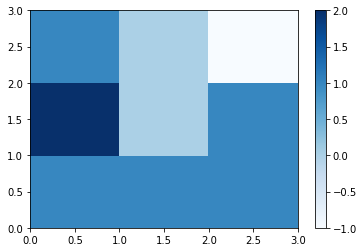

In [3]:
A = np.array([[1, 1, 1], [2, 0, 1], [1, 0, -1]])
#Note the order. The first row is plotted on bottom, not like the arrangement of a matrix.
plt.pcolor(A, cmap='Blues') 
plt.colorbar()
plt.show()

Apart from pcolor(), we also have imshow(), .contour()


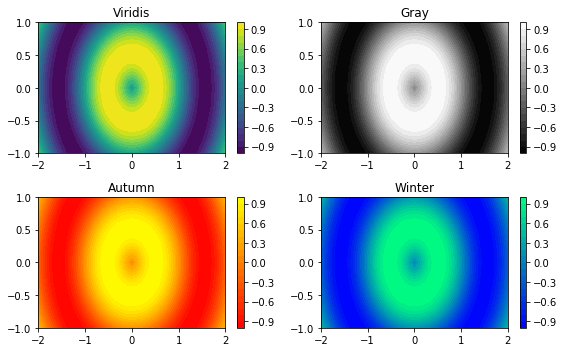

In [27]:
# Create a filled contour plot with a color map of 'viridis'
rcParams['figure.figsize'] = 8, 5
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap ='viridis') # Generate a contour map with 20 contours
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap ='gray') # Generate a contour map with 20 contours
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20,cmap = 'autumn') # cannot be 'Autumn'
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20,cmap = 'winter') # cannot be 'Winter'
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

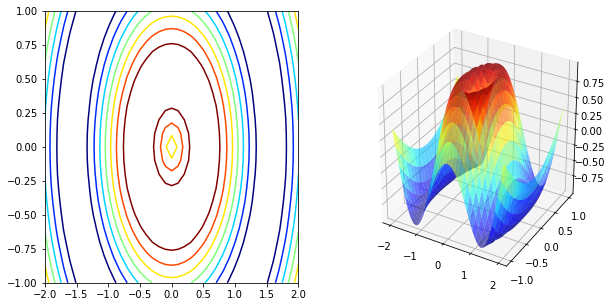

In [35]:
#Apart from the 3D display, there are many others. Check the documentation. 
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

CS = ax1.contour(X, Y, Z,  cmap=plt.cm.jet)
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)


For two-feature decision boundary plot, one solution is using contourf. 

In [1]:
def plot_decision_boundary(pred_func, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0,:].min() - .5, X[0,:].max() + .5
    y_min, y_max = X[1,:].min() - .5, X[1,:].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    #print('s',Z)
    Z = Z.reshape(xx.shape)
    print(xx.shape)
    print(yy.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap = 'summer') #cmap=plt.cm.Spectral
    plt.scatter(X[0,:], X[1,:], c=np.squeeze(Y), cmap=plt.cm.Spectral)

For uniformly spaced data, we can use pcolor, imshow, contour etc. Otherwise, we may use hist2d, hexbin etc. The later can also be used as statistical plots. 

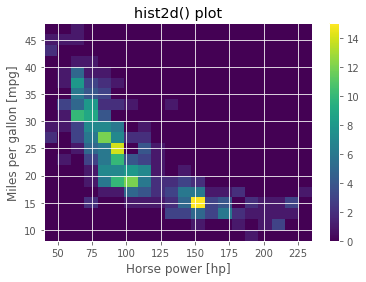

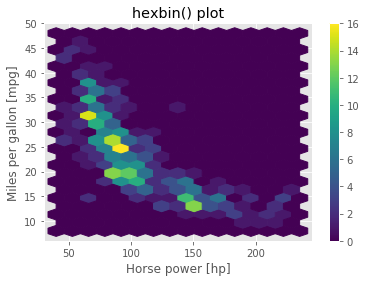

In [17]:

import pandas as pd
df = pd.read_csv('auto-mpg.csv')
hp = df['hp'].values
mpg = df['mpg'].values

# Generate a 2-D histogram
plt.hist2d(hp,mpg,bins =(20,20),range = ((40,235),(8,48))) #Within area dxdy, how many ....?
# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp,mpg,gridsize = (15,12),extent = (40,235,8,48))

plt.colorbar()
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()


Use plt.imshow() to plot 2d array, though the loaded array is usually of three dimensions. The array typically has dimensions M×N×3, where M×N is the dimensions of the image. The third dimensions are referred to as color channels (typically red, green, and blue).

(480, 480, 3)


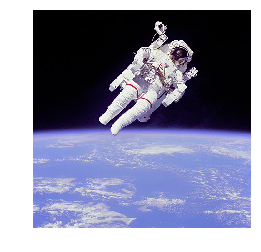

(480, 480)


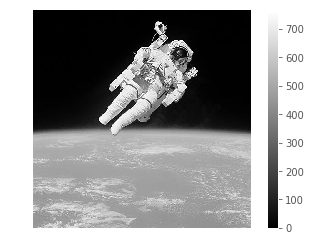

In [18]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

intensity = img.sum(axis =2 )
print(intensity.shape)
plt.imshow(intensity,cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.show()

The ratio of the displayed width to height is known as the image aspect and the range used to label the x- and y-axes is known as the image extent. The default aspect value of 'auto' keeps the pixels square and the extents are automatically computed from the shape of the array if not specified otherwise.

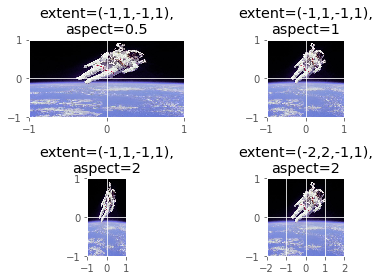

In [19]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent =(-1,1,-1,1), aspect = 1)

plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent =(-1,1,-1,1), aspect = 2)

plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img,extent = (-2,2,-1,1),aspect = 2)

plt.tight_layout()
plt.show()

low contrast images can be improved by rescaling their intensities. For instance, this image of Hawkes Bay has no pixel values near 0 or near 255 (the limits of valid intensities). Here is a simple rescaling to translate and stretch the pixel intensities so that the intensities of the new image fill the range from 0 to 255.

The smallest & largest pixel intensities are 104 & 230.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


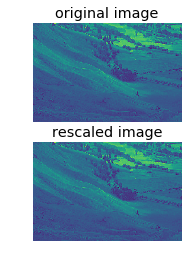

In [20]:
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

rescaled_image = 256*(image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the original image in the top subplot
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image)

# Display the rescaled image in the bottom subplot
plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)


# Statistical plots

## Joint distribution among continuous variables
### Using sns.jointplot() 
The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

kind='scatter' uses a scatter plot of the data points
kind='reg' uses a regression plot (default order 1)
kind='resid' uses a residual plot
kind='kde' uses a kernel density estimate of the joint distribution. My Comments: this seems like PDF. 
kind='hex' uses a hexbin plot of the joint distribution


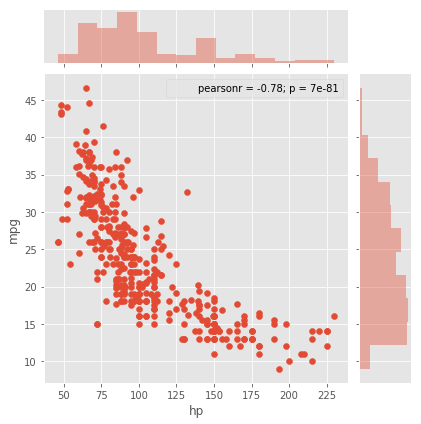

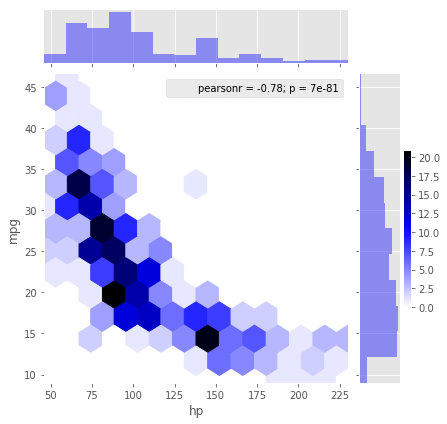

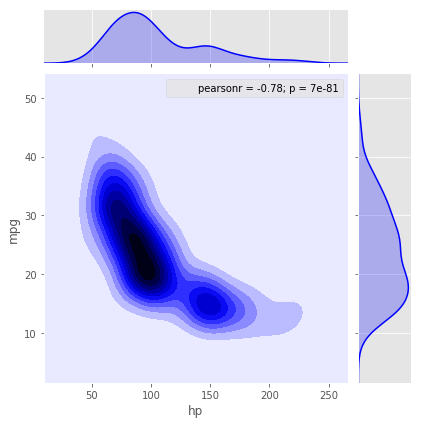

In [24]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('auto-mpg.csv')
sns.jointplot(x='hp',y='mpg', data = auto)
plt.show()

sns.jointplot(x='hp', y = 'mpg', data = auto, kind = 'hex', color = 'b')
plt.colorbar()
plt.show()

sns.jointplot(x='hp', y = 'mpg', data = auto, kind = 'kde', color = 'b')
plt.show()

### Using sns.pairplot() 
The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The diagonal of the subplot grid shows the univariate histograms of the individual columns 

    mpg   hp  weight  accel  origin
0  18.0   88    3139   14.5      US
1   9.0  193    4732   18.5      US
2  36.1   60    1800   16.4    Asia
3  18.5   98    3525   19.0      US
4  34.3   78    2188   15.8  Europe


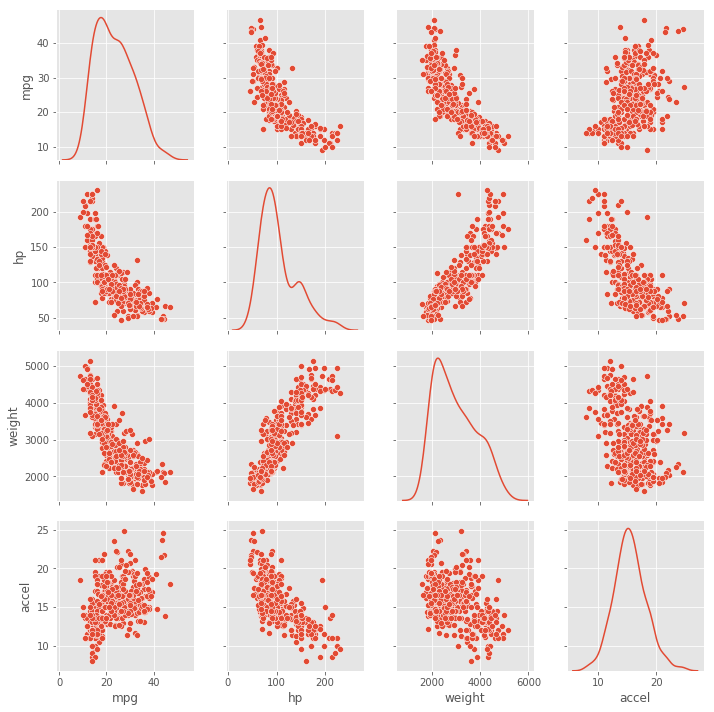

In [25]:
auto_reduced = auto[['mpg', 'hp', 'weight', 'accel', 'origin']]
print(auto_reduced.head())
sns.pairplot(auto_reduced,diag_kind ='kde')
#sns.pairplot(auto_reduced,diag_kind ='kde',kind = 'reg',hue = 'origin',size = 3.5) #Check out this option.

plt.show()

pairplot with different parameters.

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


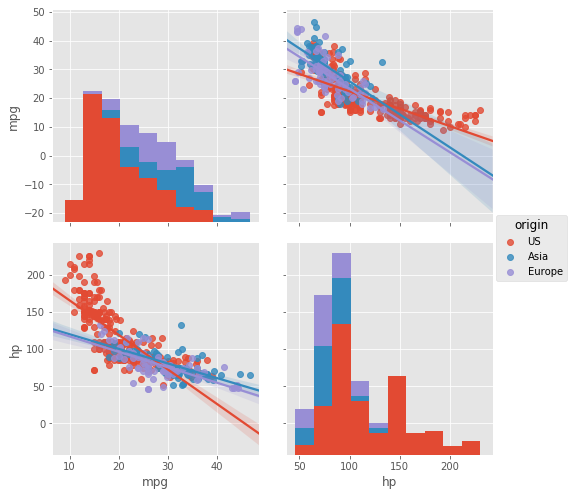

In [26]:
auto_reduced = auto[['mpg', 'hp', 'origin']]
print(auto_reduced.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto_reduced, kind = 'reg',hue = 'origin',size = 3.5)

# Display the plot
plt.show()

### Using sns.regplo, sns.lmplot for linear regression
The following regression plots can also be realized by the jointplot above with special parameters. However, they have special features for linear regression. 

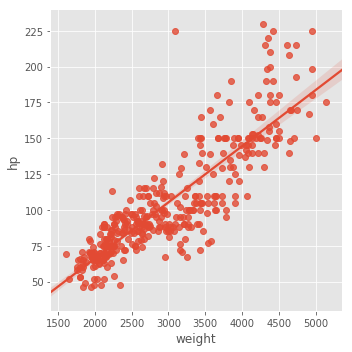

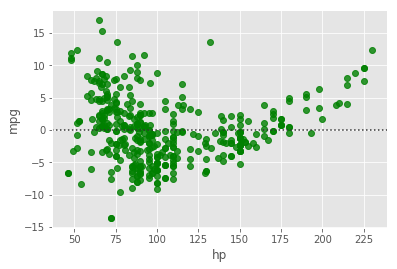

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('auto-mpg.csv')
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x ='weight', y ='hp', data =auto) #high-level graph for fast analysis. 
plt.show()

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x ='hp', y ='mpg', data=auto, color ='green')

# Display the plot
plt.show()

Seaborn makes it simple to compute and visualize regressions of varying orders. Here, you will plot a second order regression using sns.regplot(). The function sns.lmplot() is a higher-level interface to sns.regplot(). A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed. sns.regplot() is more permissive).  The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again. **Plot on the same figure, use only one plt.show. Otherwise, use as many as plt.show().**  

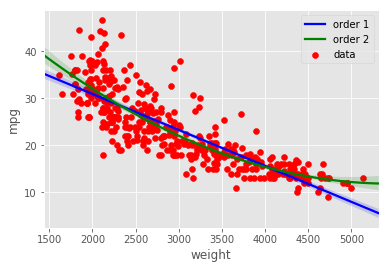

In [28]:
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='order 2')
plt.legend(loc='upper right')
plt.show()

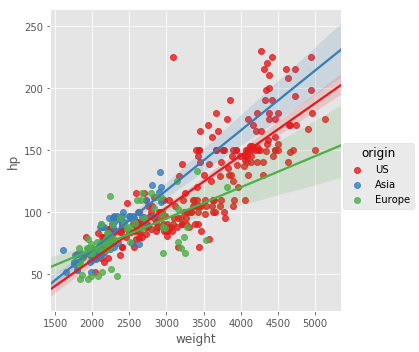

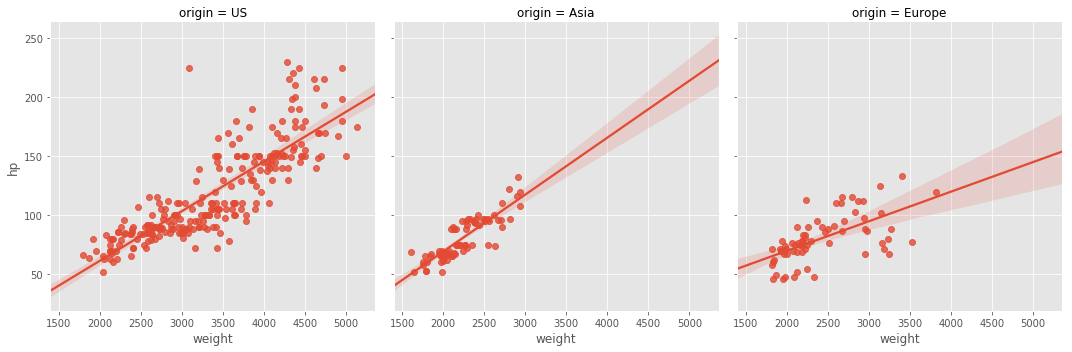

In [29]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'.
# Generate a scatter plot of 'weight' and 'mpg' using red circles
sns.lmplot(x ='weight', y ='hp', data =auto,palette ='Set1', hue = 'origin')
plt.show() #Note this is grouping by 'origin' column. 

sns.lmplot(x ='weight', y ='hp', data =auto,col = 'origin')
plt.show()


### Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. 

             mpg        hp    weight     accel     displ
mpg     1.000000 -0.778427 -0.832244  0.423329 -0.805127
hp     -0.778427  1.000000  0.864538 -0.689196  0.897257
weight -0.832244  0.864538  1.000000 -0.416839  0.932994
accel   0.423329 -0.689196 -0.416839  1.000000 -0.543800
displ  -0.805127  0.897257  0.932994 -0.543800  1.000000


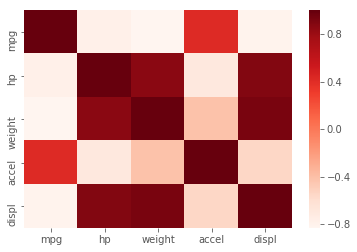

In [30]:
cov_matrix = pd.read_csv('covariance.csv',sep = '\s+', index_col=0)  
print(cov_matrix)
# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix, cmap ='Reds')
plt.show()


## Joint distribution among continuous and discrete variables
### Strip plots 
The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.
Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True helps spread out overlapping points.

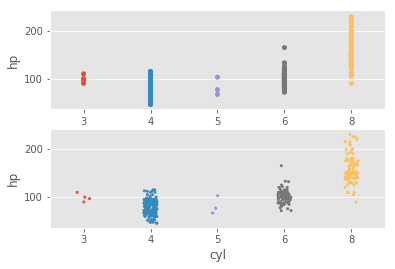

In [31]:
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, jitter = True, size = 3)
#The option jitter is to spread the data. To do so, it is better change the size of data point.
plt.show()

### Swarm plots
A strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

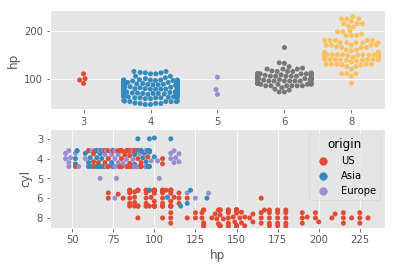

In [41]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

plt.show()


### Violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. **Box and whisker plots** are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

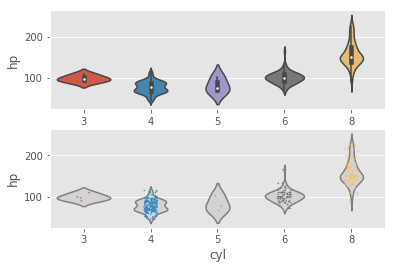

In [33]:
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

plt.show()

## Using PDF and CDF to enhance image contrast 

* So far I have learned two ways to enhance the contrast of images: increase gray scale range, and histogram equalization. The second method is much better than the first.

### Extracting a histogram from a grayscale image

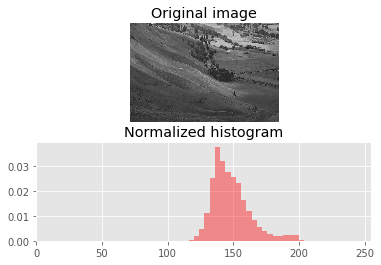

In [34]:
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off') 
plt.imshow(image,cmap = 'gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten() #Should familiar with this. 

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels,bins = 64, range= (0,256), normed = True, color = 'red', alpha = 0.4)

plt.show()


### Cumulative Distribution Function from an image histogram

The command plt.twinx() allows two plots to be overlayed sharing the x-axis but **with different scales on the y-axis.**

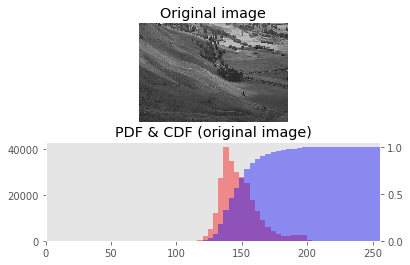

In [35]:
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range =(0,256), normed=False,
               color='red', alpha=0.4)
#The default hist() returns is PDF data and other two set of data. Here all three data are return to pdf as a tuple. If we
#want to separate them, I need proved three variables, as in the next example. 

plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot even they have different scales.
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed =True, cumulative=True,
               color='blue', alpha=0.4)
#When using the option cumulative = True, we can have cdf data, even from a hist() function. 
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()


### Equalizing an image histogram
**My understanding**. 
* Suppose that there is only one big hike on just one gray scale value, then it is super uniform, and no contrast at all. 
* Suppose there is not just one gray scale, but they are very similar, or very close to each other is the histogram. This is also very uniform as the one-value case. 
* Both two cases above are very uniform without much contrast. This corresponds to very low spatial frequency. The algorithm for histogram equalization try to counter this extreme and want to have a uniform PDF (or linear CDF), and thus increase the contrast. 
* In the future, figure out how interpolation gives histogram equalization. Also note the details of histogram function. It has three returns included in a tuple, which are necessary input of the interpolation function. Also it might output different things, depending the input parameters in plt.hist(). For example, unless we specify cumulative = True, otherwise the output is PDF data, right?  
* This might be used for preprocessing for other image applications. 

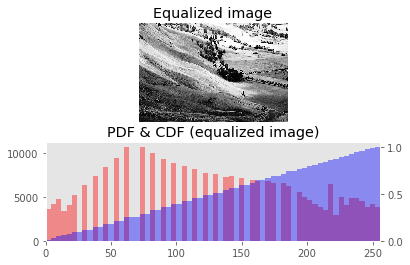

In [36]:
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)

new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape) 

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()


### Extracting histograms from a color image
The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively. 

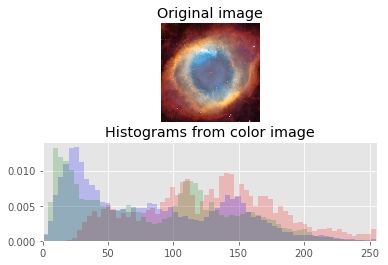

In [37]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha =0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha =0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha =0.2)

# Display the plot
plt.show()


Notice how the histogram generated from this color image differs from the histogram generated earlier from a grayscale image.

### Extracting bivariate histograms from a color image
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

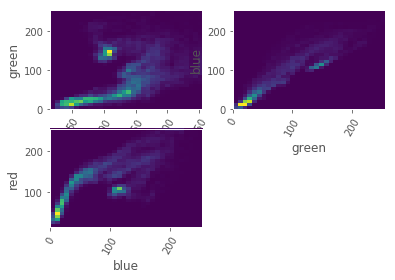

In [38]:
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels,green_pixels,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels,blue_pixels,bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels,red_pixels,bins=(32,32))

# Display the plot
plt.show()
